<a href="https://colab.research.google.com/github/ChinSekYi/Machine-Learning-Projects/blob/main/Insurance_charge_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here, we aim to use Linear Regression to model the relationship between the insurance charges (response variable) and its (explanatory variables) such age, sex, bmi, region, etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv('/content/drive/My Drive/Datasets/insurance.csv')
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


# EDA
Purpose of EDA is to determine if there's an problems with our dataset (errors, outliers, anomaly) and help us to find patterns and relations among variables.

### Note
#### Anomaly vs Outlier
**Anomalies** are referred to as data points (usually referred to multiple points), which do not conform to an expected pattern of the other items in the data set. Anomalies are referred to as a different distribution that occurs within a distribution.

An **Outlier** is a rare chance of occurrence within a given data set. It is an observation point that is distant from other observations. An Outlier may be due to variability in the measurement or it may indicate experimental error.

*reference from https://medium.com/@mehulved1503/outlier-detection-and-anomaly-detection-with-machine-learning-caa96b34b7f6


#### EDA part 1

In [3]:
# df shape
"Test data shape (row, col): "
df.shape

# df structure
"Test data structure: "
df.info()

# datatype of each col
"Test datatype: "
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
# number of data points in each variable
"Number of data points: "
df.count()

# returns object containing counts of unique values
"counts of unique value for each sex: "
df["sex"].value_counts()

# returns unique value for that feature
"number of unique values: "
df["sex"].unique

# get column names
"column names: "
df.columns.values

array(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'],
      dtype=object)

In [5]:
# summary statistics
"summary statistics: "
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### EDA part 2

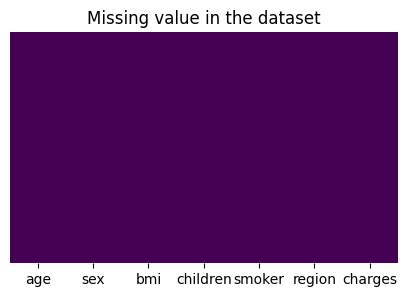

In [6]:
# check for missing values
#1
"check for missing values: "
df.isnull().sum()

#2
plt.figure(figsize = (5,3))
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis', yticklabels = False)
plt.title('Missing value in the dataset');

There is no missing value in the dataset.

#### EDA part 3: Linear Plot

<Figure size 300x200 with 0 Axes>

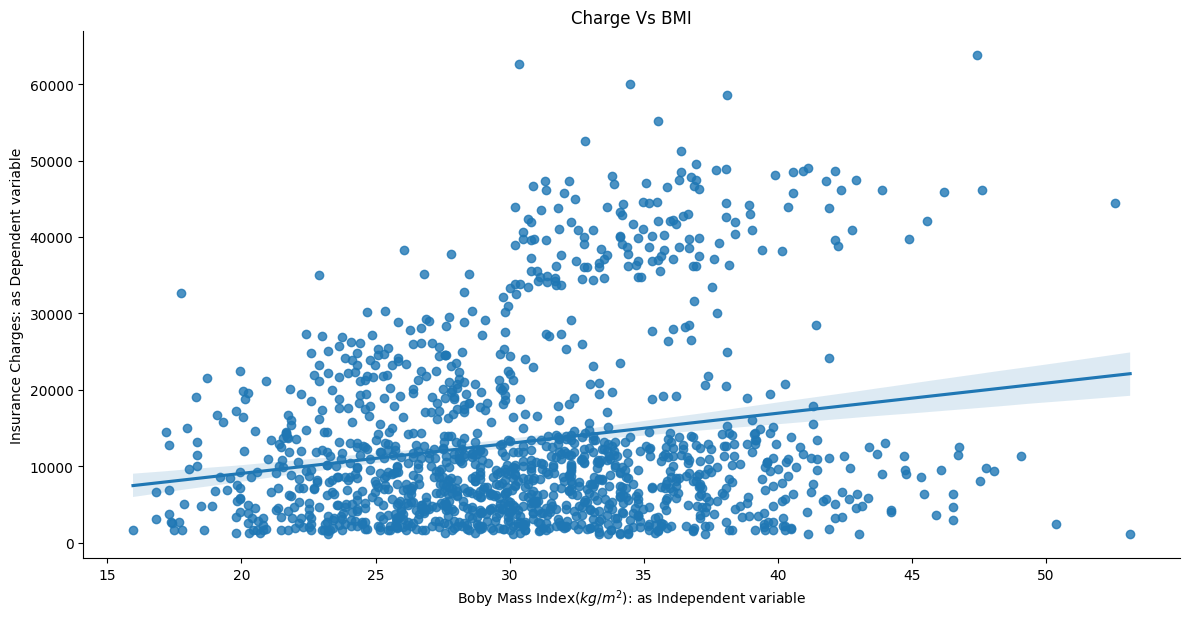

In [31]:
sns.lmplot(data = df, x = "bmi", y = "charges",
           aspect = 2, height = 6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

#### EDA part 4: HeatMap
#### Correlation

<ipython-input-8-8af880d1d873>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

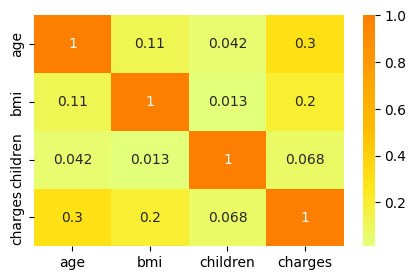

In [8]:
plt.figure(figsize = (5,3))
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot = True)

#### EDA part 5: Histogram (Probability density) Plot
displot() #display count distplot() #display probability density

<ipython-input-9-15cdf0fb2fd9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["charges"],bins=50, color='r', ax=ax)
<ipython-input-9-15cdf0fb2fd9>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df["charges"]),bins=40, color='b', ax=ax)


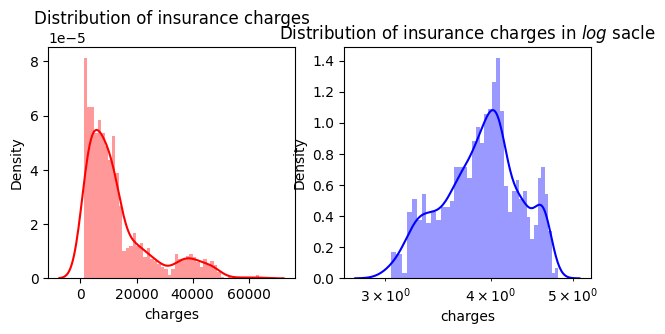

In [9]:
f = plt.figure(figsize = (7,3))

ax = f.add_subplot(121)
sns.distplot(df["charges"], bins = 50, color ='r', ax = ax)
ax.set_title('Distribution of insurance charges')

ax = f.add_subplot(122)
sns.distplot(np.log10(df["charges"]), bins = 40, color ='b', ax = ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log')

We can see that the left plot is right skewed, while right plot, after applying natural log, approximately tends to normal.



#### EDA part 6: Violin Plot

Text(0.5, 1.0, 'Violin plot of Charges vs smoker')

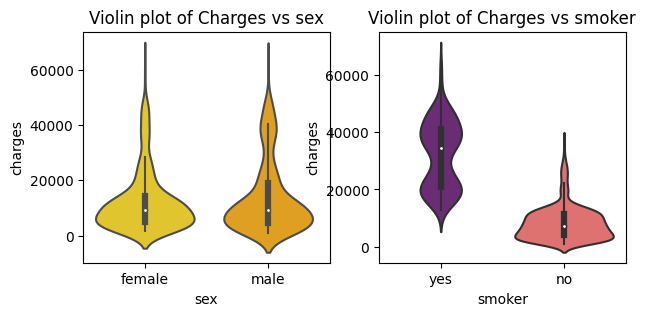

In [10]:
f = plt.figure(figsize = (7,3))

ax = f.add_subplot(121)
sns.violinplot(x="sex", y="charges", data=df, palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x="smoker", y="charges", data=df, palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker')

In [11]:
# Mean charges for smokers
df1 = df[df['smoker']=='yes']
df1_meancharges = df1.charges.mean()
df1_meancharges

32050.23183153284

In [12]:
# Mean charges for non-smokers
df2 = df[df['smoker']=='no']
df2_meancharges = df2.charges.mean()
df2_meancharges


8434.268297856204

On the left plot, we can see that the violin plot of males and females are approximately the same shape. Most females and males' insurance charges are between the range of \$2000 to \$20000, with averange around $5000.

On the right plot, the violin plot between smokers and non-smokers are very different. For smokers, the range of charges is much wider. Whereas, non-smokers tend to have lower insurance charges, below $18000.

#### EDA part 7: Box Plot & Violinplot

Text(0.5, 1.0, 'Box plot of charges vs children')

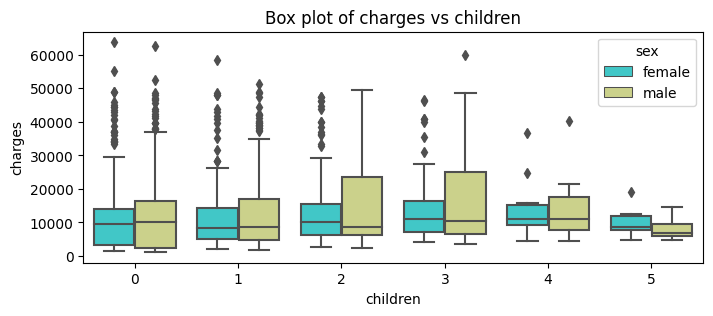

In [33]:
plt.figure(figsize = (8,3))
sns.boxplot(x = "children", y = "charges", hue = "sex", data = df, palette = "rainbow")
plt.title("Box plot of charges vs children")

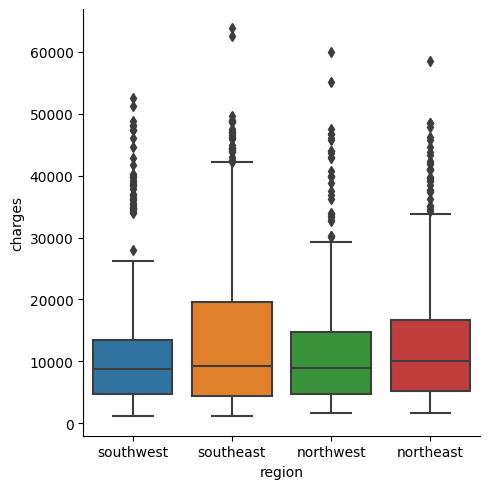

In [14]:
sns.catplot(data = df, x = "region", y = "charges", kind = "box")

In [15]:
df.groupby("children").agg(["mean","min","max"])["charges"]

<ipython-input-15-cdec8386a88a>:1: FutureWarning: ['sex', 'smoker', 'region'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby("children").agg(["mean","min","max"])["charges"]


,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


Text(0.5, 1.0, 'Violin plot of charges vs children')

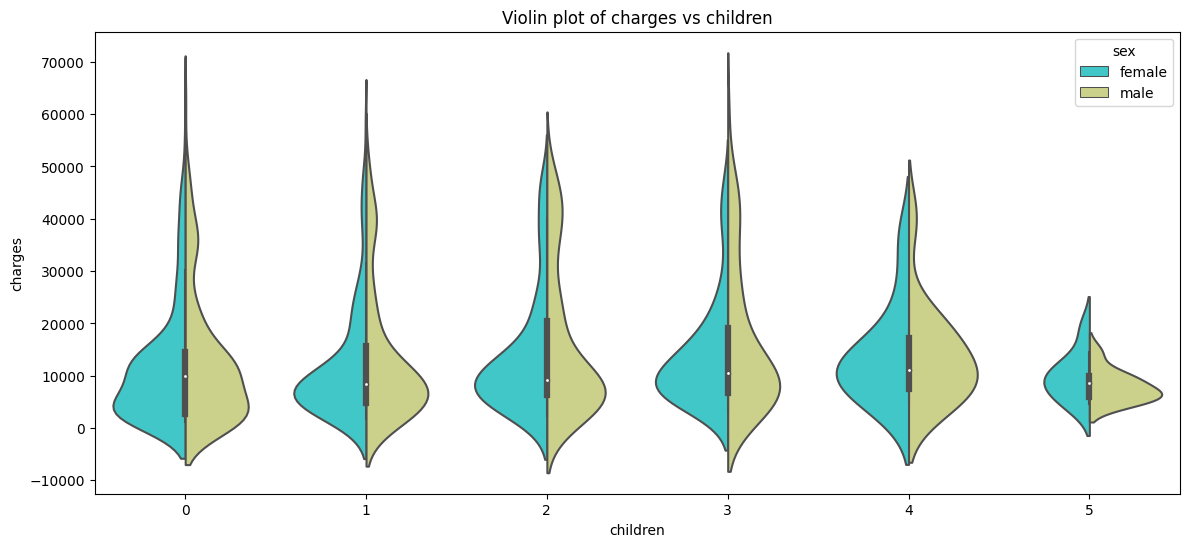

In [16]:
plt.figure(figsize=(14,6))
sns.violinplot(data=df, x = "children", y="charges",hue="sex",palette= "rainbow", split=True)
plt.title('Violin plot of charges vs children')

#### EDA part 8: Scatterplot

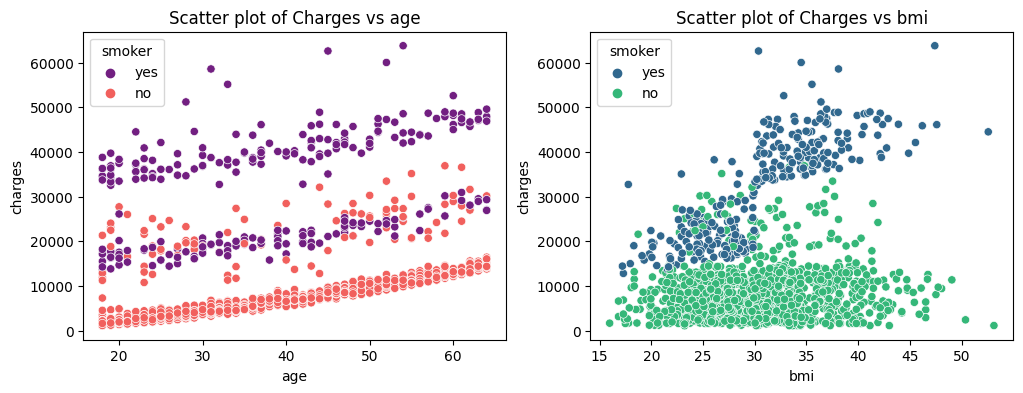

In [37]:
f = plt.figure(figsize = (12,4))
ax = f.add_subplot(121)

sns.scatterplot(x = 'age', y = 'charges', data = df, palette = 'magma', hue = 'smoker', ax = ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x = "bmi", y = "charges", data = df, palette = 'viridis', hue = 'smoker', ax = ax)
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

From the left plot, we can see a general upward trend, where insurance charges increases with age. On average, smokers have a higher insurance charges than non-smokers.

From the right plot, we can again see that smokers have a higher insurance charge than non-smokers, for all bmi values. For smokers, the charges increases with bmi, whereas in non-smokers, the charges remained roughly the same, under $35000.

# Data Preprocessing

Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to number.
Use:
1.   Label Encoding
2.   One hot encoding
3.   Dummy variable trap

In [18]:
#Dummy variable
categorical_columns = ["sex","children","smoker","region"]
df_encode = pd.get_dummies(data = df, prefix = "OHE", prefix_sep = "_",
                           columns = categorical_columns,
                           drop_first = True,
                           dtype = 'int8')

In [20]:
# Lets verify the dummy variable process
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 13)


#Box-Cox transformation
A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. Because Normality is an important assumption for many statistical techniques.

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

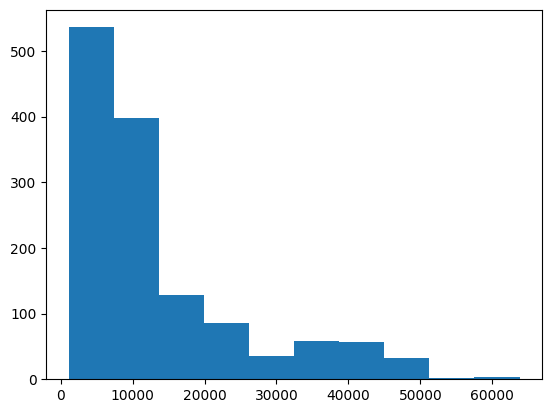

In [21]:
#visualise Charges in a histogram, to check its distribution
plt.hist(df["charges"])

From the histogram, we can see that Charges are right skewed, and not normally distributed.

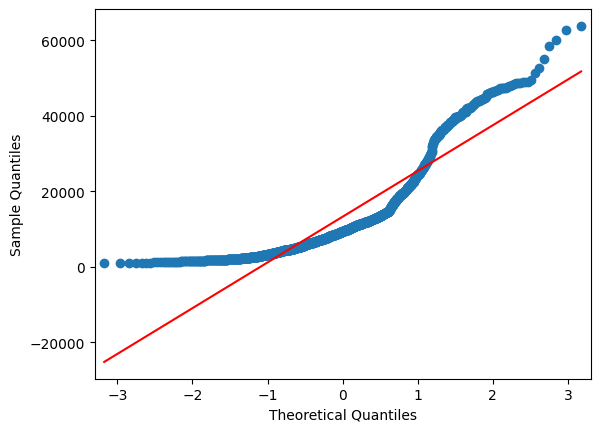

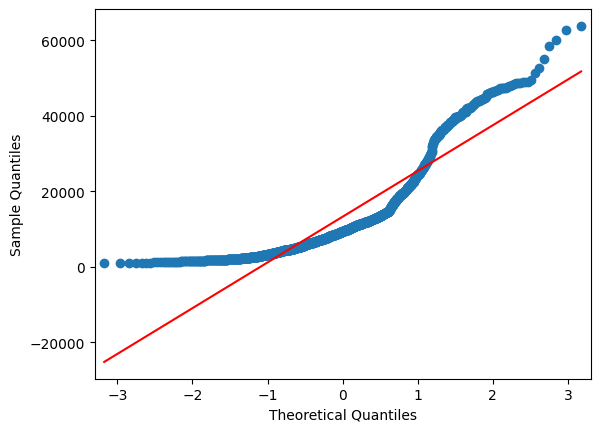

In [22]:
#plot qqplot to check the normality of Charges
import statsmodels.api as sm

sm.qqplot(df["charges"], line='s')

From the qqplot, we see that Charges violates the normality assumption as there are deviations from the theoretical line. Hence, we apply box-cox transformation to Charges, in order to transform its distribution into a normal one.

In [23]:
from scipy.stats import boxcox
y_bc, lam, ci = boxcox(df_encode['charges'], alpha = 0.05)

# df['charges'] = y_bc
ci,lam

((-0.01140290617294196, 0.0988096859767545), 0.043649053770664956)

The performance of Box-cox is not good. Let's use log transformation instead.

(array([ 46., 105., 101., 155., 198., 283., 156., 123., 115.,  56.]),
 array([ 7.02275569,  7.42678461,  7.83081352,  8.23484244,  8.63887136,
         9.04290027,  9.44692919,  9.8509581 , 10.25498702, 10.65901594,
        11.06304485]),
 <BarContainer object of 10 artists>)

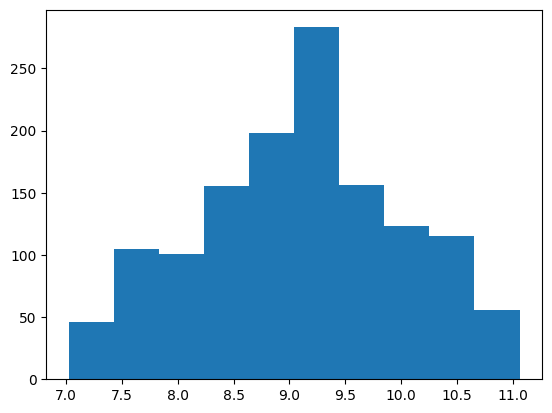

In [24]:
## Log transform
df_encode['charges'] = np.log(df_encode['charges'])
plt.hist(df_encode["charges"])

# Train Test split

In [25]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('charges', axis = 1) #independent variable
y = df_encode['charges'] #dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

# Model Building

In [26]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression().fit(X_train, y_train)
lin_reg.intercept_
lin_reg.coef_

array([ 0.03361107,  0.01327489, -0.08415741,  0.15734251,  0.29002526,
        0.27034065,  0.57203618,  0.38231537,  1.53336331, -0.09920739,
       -0.15018268, -0.15025841])

# Model Evaluation


In [27]:
from sklearn.metrics import mean_squared_error

y_pred_sk = lin_reg.predict(X_test)

#Evaluation: Mean Squared Error (MSE)
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R^2 test
R_square_sk = lin_reg.score(X_test,y_test)

print('The Mean Square Error(MSE) is: ', J_mse_sk)
print('R square obtain for scikit learn library is :', R_square_sk)

The Mean Square Error(MSE) is:  0.183825275285954
R square obtain for scikit learn library is : 0.8000967578950953


The model returns a R^2 value of 78.5%, so the model is a good fit for the data.

# Model Validation

Check a few assumptions for a linear model.
Linear Relationship: In linear regression the relationship between the

1.   Linear relationship
2.   Residual error plot should be normally distributed
3.   The mean of residual error should be 0 or close to 0
4.   The linear regression require all variables to be multivariate normal. This assumption can best checked with Q-Q plot.
5.   Linear regession assumes that there is little or no Multicollinearity in the data. Occurs when the independent variables are too highly correlated with each other.

<ipython-input-28-82ac0e8b890f>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, ax = ax, color ='b')


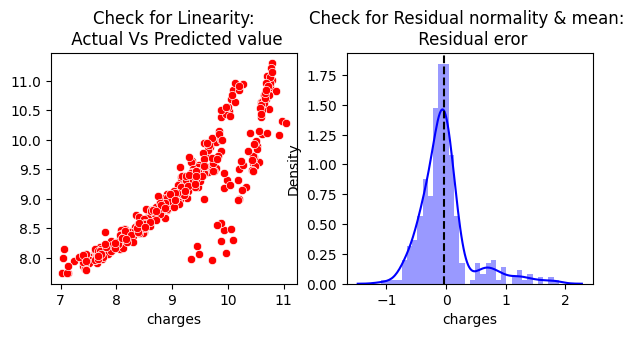

In [28]:
# Check for Linearity
f = plt.figure(figsize = (7,3))
ax = f.add_subplot(121)
sns.scatterplot(x = y_test, y = y_pred_sk, ax = ax, color = 'r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
res = (y_test - y_pred_sk)
sns.distplot(res, ax = ax, color ='b')
ax.axvline(res.mean(), color = 'k',linestyle = '--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

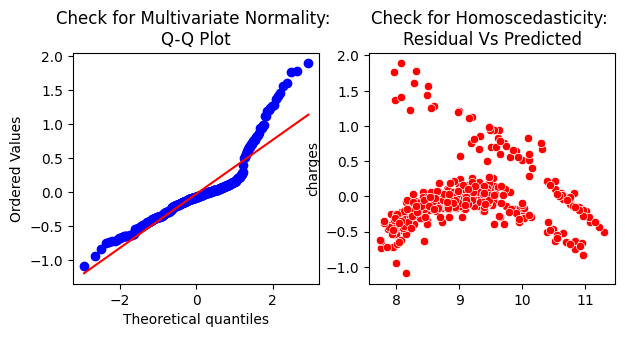

In [29]:
# Check for Multivariate Normality
# Quantile-Quantile plot
import scipy as sp
f,ax = plt.subplots(1,2,figsize=(7,3))
sp.stats.probplot(res, fit = True, plot = ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = res, x = y_pred_sk, ax = ax[1], color ='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

The model assumption linear regression as follows:

1. In our model the actual vs predicted plot is curve so linear assumption fails.
2. The residual mean is zero and residual error plot right skewed.
3. Q-Q plot shows as value log value greater than 1.5 trends to increase
4. The plot is exhibit heteroscedastic, error will increase after certain point.